In [5]:
#https://stackoverflow.com/questions/41244322/how-to-color-voronoi-according-to-a-color-scale-and-the-area-of-each-cell
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import tqdm

In [6]:
%matplotlib widget

In [20]:
data = pd.read_csv('./Example Files/231013-130748_mbm test.txt', sep = ' ', header = None)
data.columns = ['track_id', 't', 'x', 'y', 'f', 'dcr']

In [21]:
data = data[0.5e-5 > data['x']]
data = data[0 < data['x']]

data = data[-8e-6 < data['y']]
data = data[-4e-6 > data['y']]

data['x'] = data['x'] * 1e6
data['y'] = data['y'] * 1e6

#plt.clf()
#plt.scatter(data['x'], data['y'], s=0.1)
#plt.show()

In [22]:
vor = Voronoi(data[['x','y']].values)

100%|████████████████████████████████| 340092/340092 [00:05<00:00, 67211.85it/s]


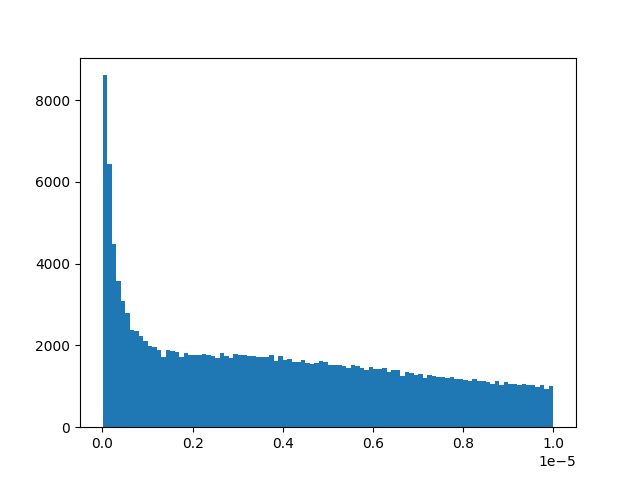

In [32]:
areas = []
for r in tqdm.tqdm(range(len(vor.point_region))):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        raw_polygon = [vor.vertices[i] for i in region]
        polygon = Polygon([vor.vertices[i] for i in region])        
        areas.append(polygon.area)

plt.clf()
plt.hist([a for a in areas if a < 1e-5], bins=100)
plt.show()

100%|██████████████████████████████████| 340092/340092 [09:11<00:00, 616.88it/s]


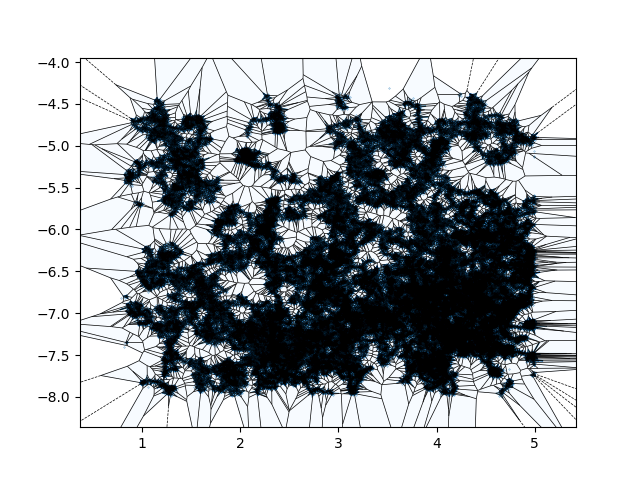

In [36]:
plt.clf()

#fig = voronoi_plot_2d(vor, line_width=0.5, point_size=0.5, show_vertices=False)
voronoi_plot_2d(vor, line_width=0.5, point_size=0.5, show_vertices=False)

minima = 0
maxima = 1e-3

norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

#ax = fig.gca()

for r in tqdm.tqdm(range(len(vor.point_region))):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        raw_polygon = [vor.vertices[i] for i in region]
        polygon = Polygon([vor.vertices[i] for i in region])        
        plt.fill(*zip(*raw_polygon), color=mapper.to_rgba(polygon.area))

"""
for track_id in tqdm.tqdm(data['track_id'].unique()):
    track_data = data[data['track_id'] == track_id]
    track_data = track_data.sort_values('t')
    plt.plot(track_data['x'], track_data['y'], linewidth=1)
"""
plt.show()